In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [8]:
df = pd.read_csv(r'''D:\filegw\Data-Mining-Student-Performance-master\Data-Mining-Student-Performance-master\datat.csv''')
df.head()


,sex,age,Medu,Fedu,studytime,failures,famrel,freetime,health,absences,address,guardian,G3
0,F,18,4,4,2,0,4,3,3,6,U,mother,6
1,F,17,1,1,2,0,5,3,3,4,U,father,6
2,F,15,1,1,2,3,4,3,3,10,U,mother,10
3,F,15,4,2,3,0,3,2,5,2,U,mother,15
4,F,16,3,3,2,0,4,3,5,4,U,father,10


In [9]:
inputs = df.drop('G3',axis='columns')
target = df['G3']
inputs.head()


,sex,age,Medu,Fedu,studytime,failures,famrel,freetime,health,absences,address,guardian
0,F,18,4,4,2,0,4,3,3,6,U,mother
1,F,17,1,1,2,0,5,3,3,4,U,father
2,F,15,1,1,2,3,4,3,3,10,U,mother
3,F,15,4,2,3,0,3,2,5,2,U,mother
4,F,16,3,3,2,0,4,3,5,4,U,father


In [10]:
target.head()

0     6
1     6
2    10
3    15
4    10
Name: G3, dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder
le_sex = LabelEncoder()
inputs['sex_n'] = le_sex.fit_transform(inputs['sex'])
inputs.head()

,sex,age,Medu,Fedu,studytime,failures,famrel,freetime,health,absences,address,guardian,sex_n
0,F,18,4,4,2,0,4,3,3,6,U,mother,0
1,F,17,1,1,2,0,5,3,3,4,U,father,0
2,F,15,1,1,2,3,4,3,3,10,U,mother,0
3,F,15,4,2,3,0,3,2,5,2,U,mother,0
4,F,16,3,3,2,0,4,3,5,4,U,father,0


In [12]:
inputs_n = inputs.drop(['sex','age','failures', 'address', 'guardian'],axis='columns')
inputs_n.head()

,Medu,Fedu,studytime,famrel,freetime,health,absences,sex_n
0,4,4,2,4,3,3,6,0
1,1,1,2,5,3,3,4,0
2,1,1,2,4,3,3,10,0
3,4,2,3,3,2,5,2,0
4,3,3,2,4,3,5,4,0


In [13]:
pred_train, pred_test, tar_train, tar_test = train_test_split(inputs_n, target, test_size= 0.25)

In [14]:
pred_train.shape

(592, 8)

In [15]:
pred_test.shape

(198, 8)

In [16]:
tar_train.shape

(592,)

In [17]:
tar_test.shape

(198,)

In [30]:
 model = tree.DecisionTreeClassifier(max_depth=6)
classifier = model.fit(pred_train,tar_train)
classifier

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [31]:
classifier.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [32]:
predictions = classifier.predict(pred_test)
predictions

array([12, 13,  0, 11, 14, 11,  8, 10, 12, 11,  0, 12, 16, 11, 14,  0,  0,
        6, 10, 10, 11, 10, 16,  8,  0, 11,  6, 16, 10, 10, 11,  6, 10,  8,
       10,  8,  6, 12, 10,  6, 11, 10, 18,  8, 10, 16,  6, 12, 10, 10, 10,
       15, 13,  8, 10, 11, 11, 13, 16, 14, 10, 10,  6, 10,  6, 16,  6, 12,
       18, 13, 19, 11,  0, 13, 15, 15,  6, 11,  6,  8,  8, 11, 14,  0,  8,
        8, 11,  8,  0, 12, 15,  8, 10,  8,  6, 19, 19, 14, 10,  6, 12, 16,
       19, 13, 10, 10,  0,  0,  0, 10,  6,  6,  0, 10, 18, 13, 10,  0, 10,
        8,  8,  0,  8, 10, 11, 15, 11, 16, 16, 10, 14, 11, 10, 11, 16,  0,
       16, 10, 10, 11,  0, 10,  6,  0, 11, 15,  0, 10,  6, 10, 10, 13, 11,
        6, 11, 12,  8, 10, 13, 11, 11, 10, 11, 11, 10, 11, 16,  0,  0, 10,
        8, 11,  0,  8,  0,  6, 11, 10, 12, 14, 10, 10, 14,  6, 13, 10, 15,
       16, 11,  0, 10,  8,  0,  0,  8,  5, 11, 10], dtype=int64)

In [33]:
#classification accuracy
print("accuracy of training dataset is{:.2f}".format(classifier.score(pred_train,tar_train)))
print("accuracy of test dataset is {:.2f}".format(classifier.score(pred_test,tar_test)))
print(accuracy_score(tar_test, predictions, normalize = True))

accuracy of training dataset is0.43
accuracy of test dataset is 0.26
0.26262626262626265


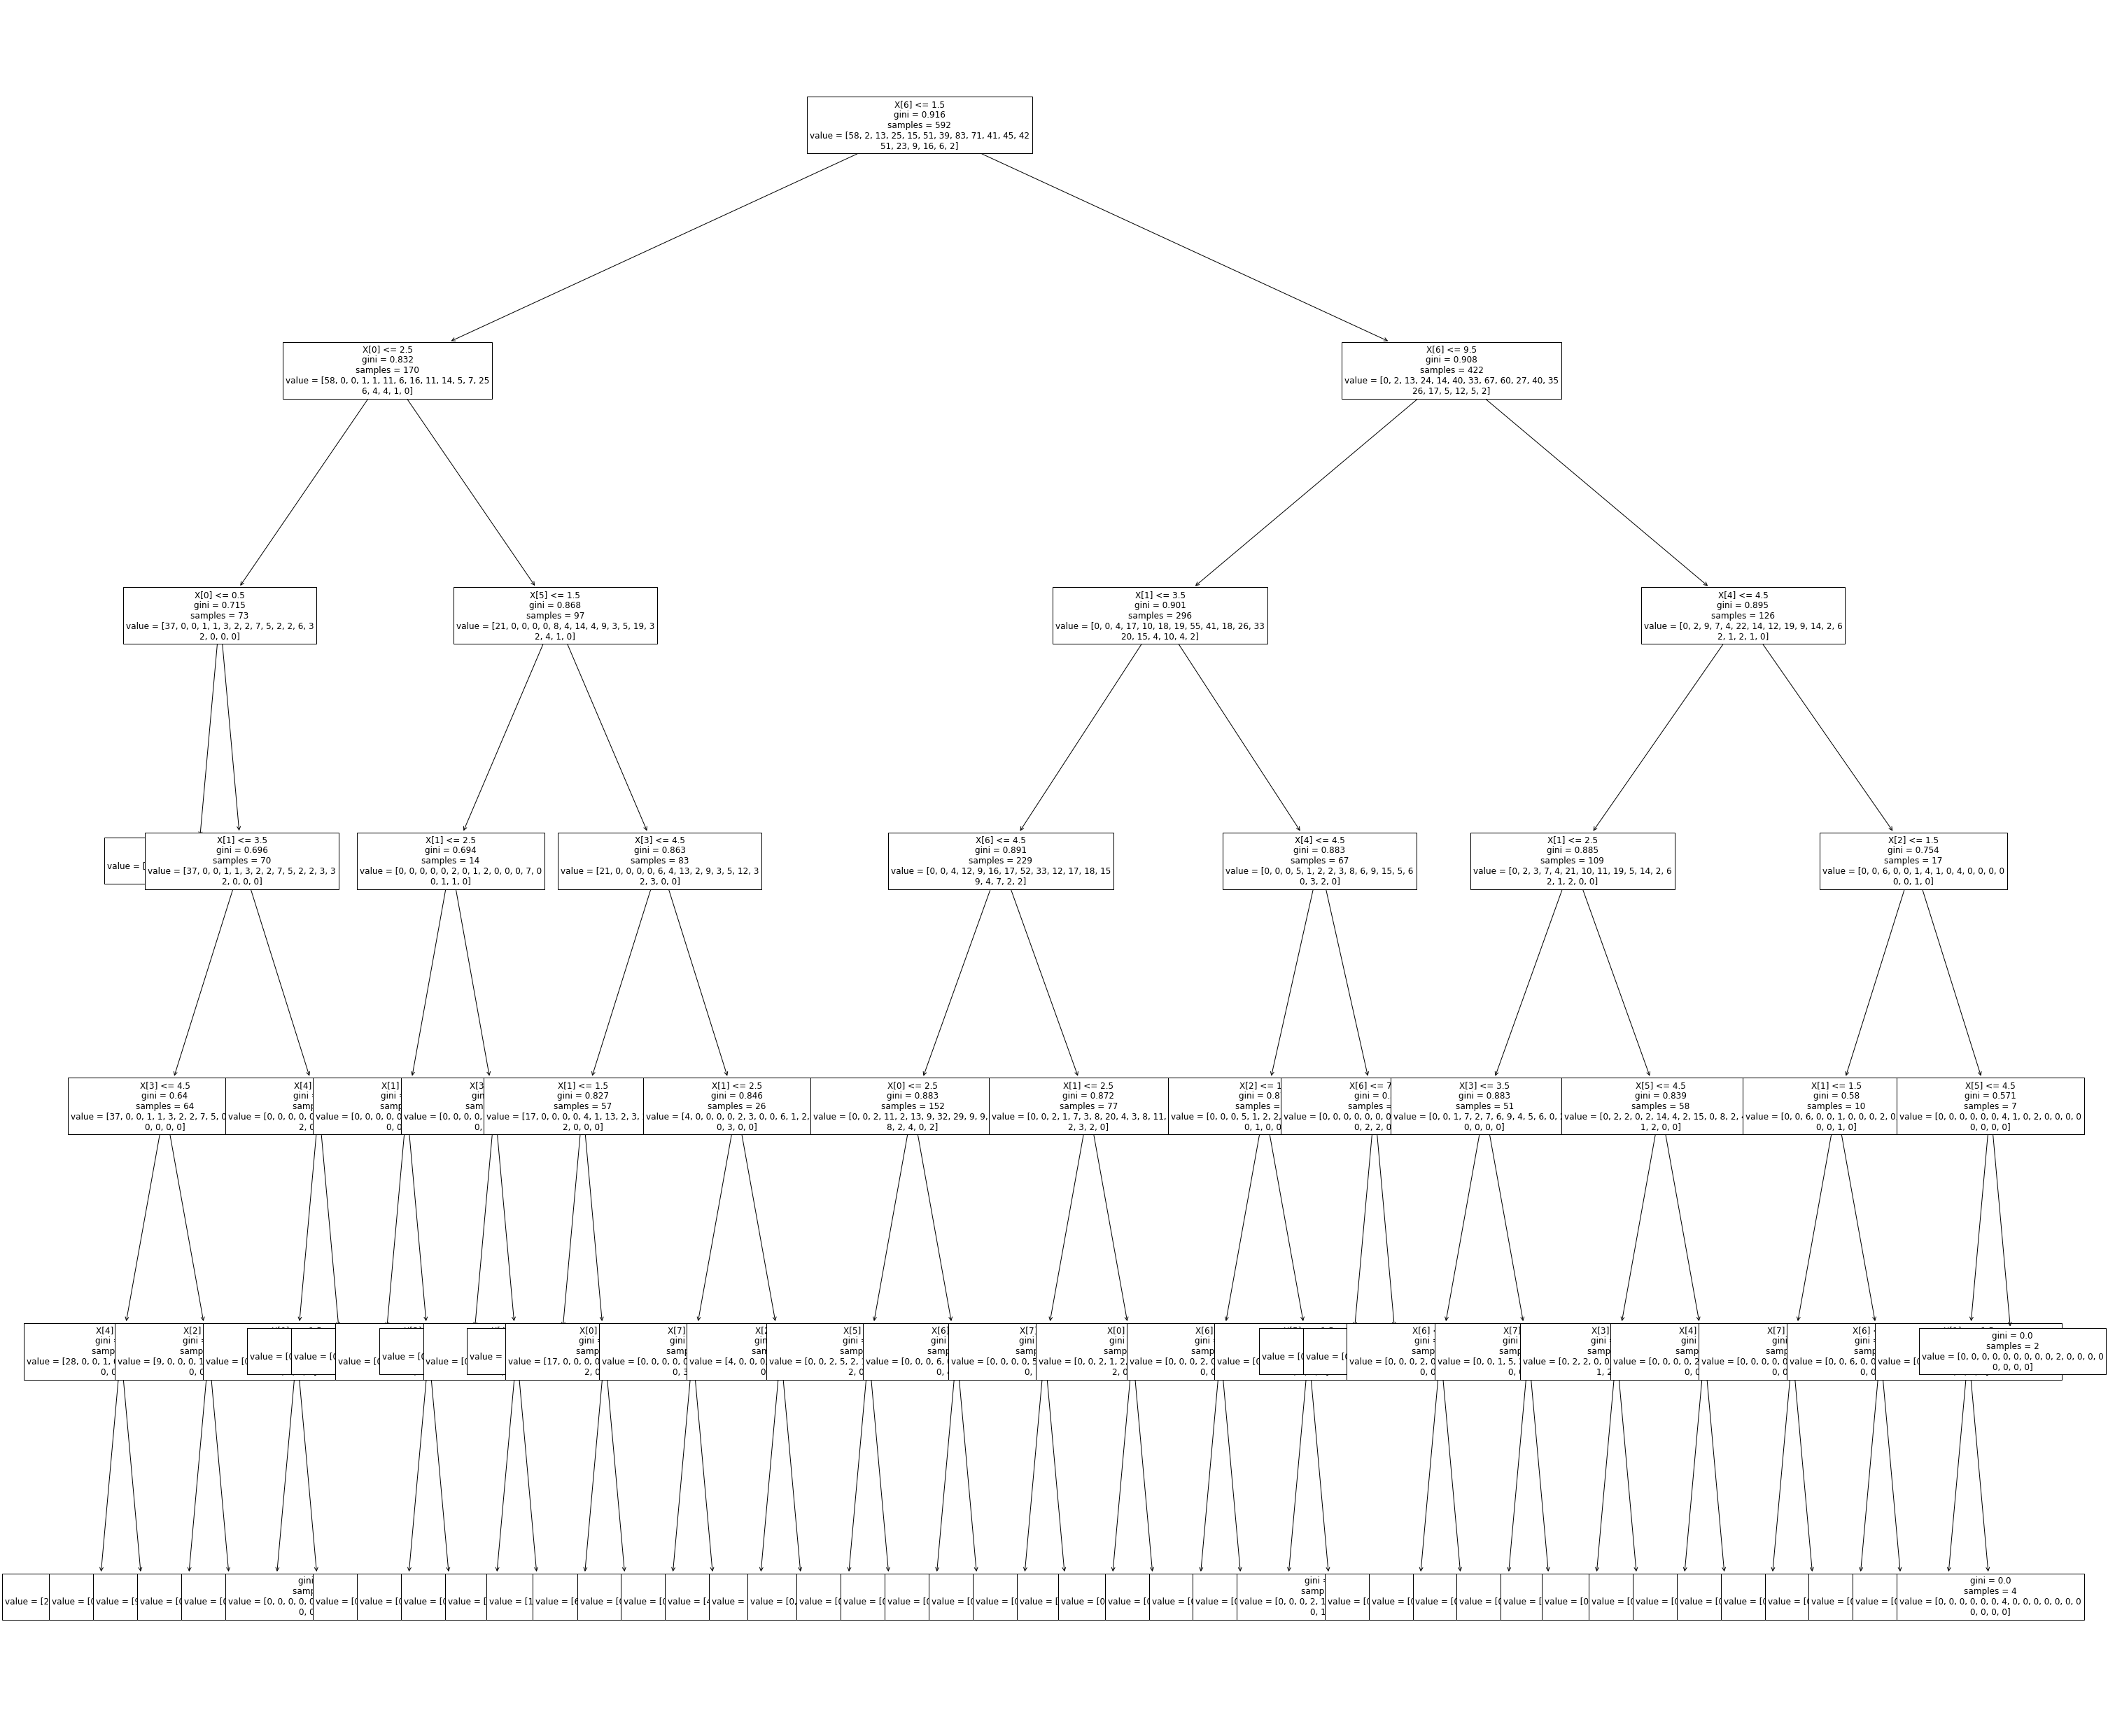

In [35]:
from sklearn import tree
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(50,45))
_ = tree.plot_tree(classifier,
                    fontsize= 12)

In [23]:
xx = classifier.predict([[3,3,2,4,3,5,4,0]])
xx

array([10], dtype=int64)

In [24]:
if xx >= 10:
  print("lulus")
else:
  print("tidak lulus")

lulus


0.22.1
